In [32]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

Deep Learning consiste em um ramo da IA que se baseia em algoritmos de redes neurais para aprendizado de maquina por meio de ingestão de dados. Podemos criar um sistema com um único "neurônio" para tarefas lineares.

Os inputs do neurônio são os dados recebidos em forma de vetores e o output consiste em uma combinação linear somado por um viés (bias) das informações armazenadas nos vetores, os algoritmos de redes neurais aprimoram o resultado do output por meio de calibração das constantes associadas ao vetor, ou seja, modificando o peso de cada informação do input para melhorar o resultado.

Exemplo de uma unidade linear com 3 variávreis como input:

$ Y = w_1x_1 + w_2x_2 + w_3x_3 + b$

O input consiste em um vetor com as variáveis [x1, x2, x3], a cada variável é associado um peso "w_i" e essa combinação é somada por um bias "b" que resultam no output Y.

Contruindo unidades lineares com Keras:

In [33]:
# A classe Sequentials permite criar  redes neurais sequenciais de forma simples e rápida

modelo = keras.Sequential(
    [layers.Dense(units=1, input_shape=[11])]
)

# Units representa o número de outputs na rede e Input_shape o número de variáveis no imput, o
# input_shape é informado como uma lista que permitirá uso de dados mais complexos

Observando os pesos e viés:

In [34]:
w, b = modelo.weights

print(f'Pesos =\n {w}\n \nBias =\n{b}')

Pesos =
 <tf.Variable 'dense_22/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[-0.29560938],
       [ 0.20661849],
       [-0.06003803],
       [-0.43977234],
       [ 0.35897714],
       [-0.46104354],
       [-0.06118321],
       [ 0.5946607 ],
       [ 0.10531282],
       [-0.23811552],
       [-0.29651555]], dtype=float32)>
 
Bias =
<tf.Variable 'dense_22/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


Os pesos (w) são representados por tensores que armazenam pesos para cada variável no imput (11 no nosso modelo) e o aprimoramento do modelo ocorre com a calibração de cada um dos pesos (antes de treinar o modelo os pesos são aleatórios e o viés é igual a zero).

Redes neurais podem compreender relações mais complexas, uma das ideias chave é a modularidade que consiste em dividir o modelo em módulos independentes que podem ser treinados e ajustados separadamente, ou seja, construir um modelo mais complexo usando várias unidades lineares para contruir modelos mais complexos.

Redes neurais organizam neurônios em camadas (Layers), quando coletamos unidades lineares com um input em comum temos uma Dense Layer

Função de Ativação:

Mesmo Dense Layers ainda não são capazes, por sí só, de construir relações não lineares, para isso precisamos de uma função de ativação. Funções de ativação são simplesmente funções aplicadas ao output das layers.

Construindo modelos sequenciais:

O modelo sequencial irá conectar uma layer em outra, a primeira layer recebe o input e a última retorna o output.

In [35]:
# Usaremos a função de ativação chamada de função de retificação, denotada por "relu"

modelo = keras.Sequential([
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    #layer que retornará o output
    layers.Dense(units=1)
])

No modelo acima temos uma primeira camada contendo 4 neurônios que recebem os inputs (com dimensão igual a 2) e aplicam a função de ativação no seu própio output. esses outputs da primeira camada servem como input para a segunda camada com 3 neurônios e assim sucessivamente.

A ultima layer retorna um valor, sem uma função de ativação, isto é apropriado para redes que visam uma tarefa de regressão, outras tarefas como classificação podem necessitar uma função de ativação para o output final

Em alguns casos, podemos omitir a função de ativação dentro da "layers.Dense" e criar uma "layer de ativação" com "layers.Activation()" entre as "layers.Dense"

Existem várias funções de ativações no keras, vamos observar algumas delas:

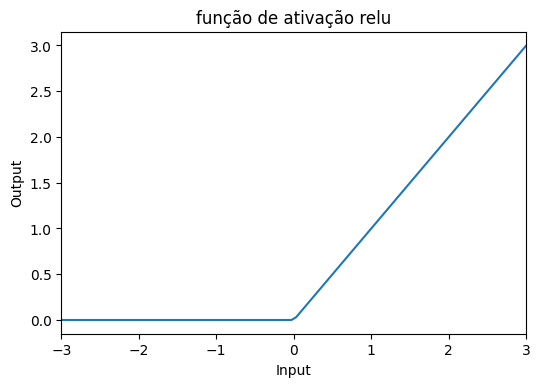

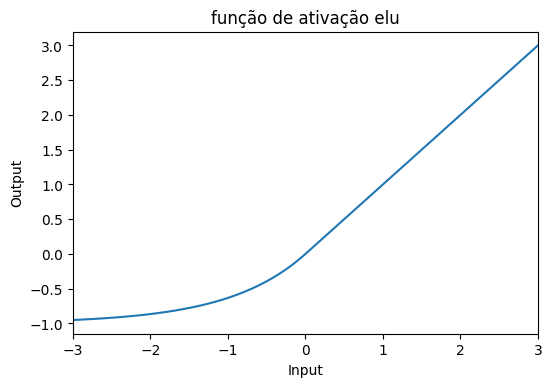

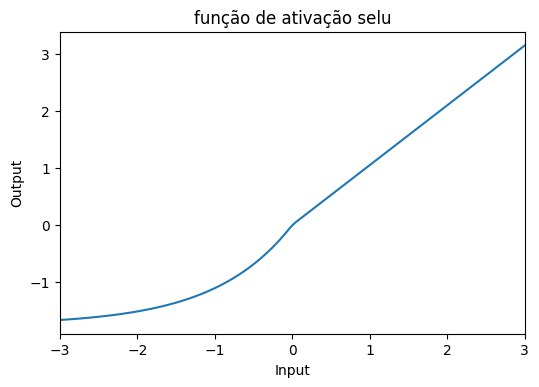

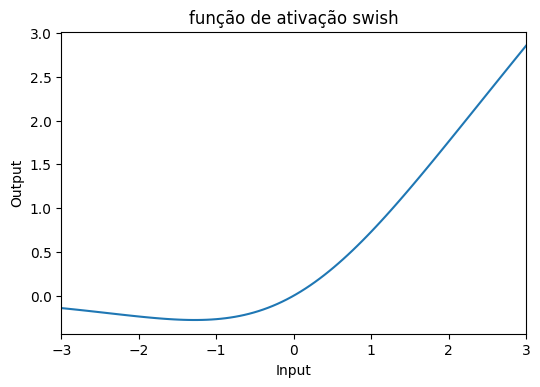

In [36]:
funções = ['relu', 'elu', 'selu', 'swish']

for i in funções:
    activation_layer = layers.Activation(i)

    x = np.linspace(-3.0, 3.0, 100)
    y = activation_layer(x)

    plt.figure(dpi=100)
    plt.plot(x, y)
    plt.xlim(-3, 3)
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.title(f"função de ativação {i}")
    plt.show()

Stochastic Gradient Descent

Até agora os pesos associados as variáveis eram randômicos, agora vamos ver como treinar uma rede neural, em outras palavras, ver como uma rede neural aprende.

Como em modelos de machine learning, o primeiro passo é ter um conjunto de dados para treino, estes dados contém variáveis que serão os inputs e uma variável alvo que será usada para prever o output.

As redes neurais vão precisar de mais duas coisas além dos dados de treino, a primeira é uma "Loss Function" que vai medir o quão bom são as previsões da rede, a segunda é um "Optimizer" que informa a rede sobre como mudar os valores dos pesos.

Loss Function:

A loss function mede a disparidade entre o valor verdadeiro da variável alvo e o valor determinado pelo modelo. Problemas diferentes exigem loss functions diferentes. Para problemas de regressão uma função utilizada é o erro médio absoluto:

$e = \dfrac{1}{n}\sum_{i=1}^{n}|y_{i real} - y_{i previsto}|$

Até para um único problema, como regressão, diversas outra funções podem ser utilizadas. Independente da função escolhida, a rede utilizará ela como guia para determinar valores corretos.

Optimizer:

Uma vez que o problema é estabelecido, o Optimizer dirá para a rede como resolve-lo. Todos os algoritmos de optimização pertencem a família "Stochastc Gradient Descent", estes algoritmos treinam a rede em passos:

1) Treina com uma amostra dos dados de treino e tenta fazer previsões com a rede

2) Mede a diferença entre os valores previstos e o valor verdadeiro

3) Ajusta os valores dos pesos para diminuir a diferença

Este processo é repetido até atingir a precisão desejada ou até não haver diminuição nessa diferença.

Cada iteração com uma amostra de dados é chamada "batch" e uma iteração com todos os dados é chamada "epoch".

Taxa de aprendizado:

A cada batch os valores dos pesos muda, mudando assim a inclinação da reta associada ao processo, o tamanho dessas variações na inclinação da reta é determinado pela taxa de aprendizado, uma taxa de aprendizado menor indica que a rede precisa de mais batches até que os valores dos pesos convirjam para os melhores valores.

Agora vamos ver na prática :)

In [37]:
import pandas as pd

vinho = pd.read_csv('red-wine.csv')
vinho.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


O dataset anterior contém propriedades fisico-químicas de vinhos e sua respectiva qualidade, a variável alvo é a qualidade do vinho, que será determinada com base nas propriedades fisico-químicas.

In [38]:
X = vinho.drop(columns=['quality'])
y = vinho['quality']

# Após separar a variável alvo, determinamos o número de variáveis que serão usadas como input

print(f'Número de variáveis no input = {X.shape[1]}')

Número de variáveis no input = 11


In [39]:
modelo = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

# Após criar a arquitetura do modelo, compilamos sobre ele o optimizer e a loss function:

modelo.compile(
    optimizer='adam',
    loss='mae'
)


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

historico = modelo.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=10,
)

# Informamos o Keras para alimentar o optimizer com 256 linhas dos dados de treino para cada batch e 
# realizar isso 10 vezes com todos os dados.

Epoch 1/10
5/5 [==============================] - 1s 44ms/step - loss: 4.0745 - val_loss: 1.5010
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 1.2766 - val_loss: 1.1340
Epoch 3/10
5/5 [==============================] - 0s 20ms/step - loss: 1.0917 - val_loss: 0.7128
Epoch 4/10
5/5 [==============================] - 0s 19ms/step - loss: 0.8899 - val_loss: 0.8944
Epoch 5/10
5/5 [==============================] - 0s 19ms/step - loss: 0.7676 - val_loss: 0.7068
Epoch 6/10
5/5 [==============================] - 0s 21ms/step - loss: 0.6680 - val_loss: 0.7236
Epoch 7/10
5/5 [==============================] - 0s 22ms/step - loss: 0.6852 - val_loss: 0.6172
Epoch 8/10
5/5 [==============================] - 0s 22ms/step - loss: 0.6167 - val_loss: 0.6026
Epoch 9/10
5/5 [==============================] - 0s 21ms/step - loss: 0.5851 - val_loss: 0.5633
Epoch 10/10
5/5 [==============================] - 0s 20ms/step - loss: 0.5652 - val_loss: 0.5448


A cada iteração completa dos dados o Keras informa o erro entre os dados de treino e de validação (teste). Podemos também visualizar o erro através de um plot:

Text(0.5, 1.0, 'Diminuição do erro')

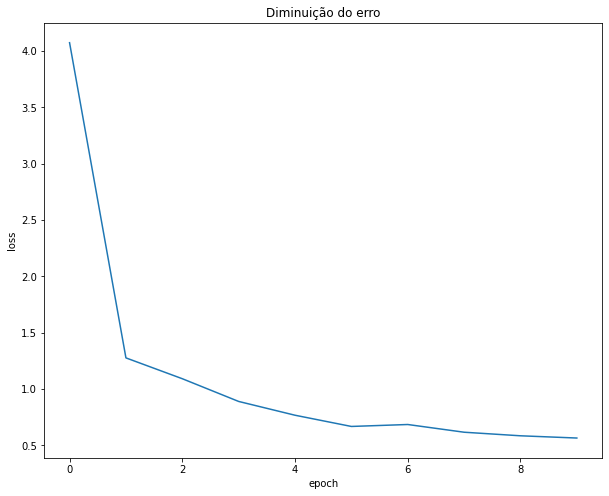

In [41]:
hist_df = pd.DataFrame(historico.history)

plt.figure(figsize=(10,8))
hist_df['loss'].plot()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Diminuição do erro')

A curva do loss diminuí a cada epoch até ficar horizontal, onde o modelo teve seu maior desempenho e já não é necessário novos epochs.

Esta curva gerada pela loss a cada epoch é chamada curva de aprendizado e podemos extrair informações adicionais a partir delas.

A informação contida nos dados de treino podem ser divididas em duas partes:

1 - Sinal: O sinal contém a informação e comportamento geral dos dados e é com ele que o modelo aprende a fazer previsões para novos dados.

2 - Ruído: Ruído vem da flutuação randômica dos dados e seus "padrões" não são informativos e podem ser prejudiciais ao modelo, levando ele ao overfitting,

A curva de aprendizagem dos dados de treino pode diminuir quando o modelo começa a "aprender" com o ruído, porém esta mesma curva tende a aumentar para os dados de validação visto que o modelo aprendeu padrões únicos dos dados de treino que não podem ser generalizados para novos dados.

Aprender pouco sinal (Underfitting) ou aprender muito ruído (Overfitting)? Devemos fazer essa troca nos guiando pela curva de aprendizagem dos dados de validação.

Capacidade:

Capacidade de um modelo informa o tamanho e complexidade dos padrões que o modelo consegue aprender, para redes neurais a capacidade é determinada pela quantidade de neurônios e como eles estão ligados.

Podemos aumentar a capacidade aumnentando o número de neurônios por camada ou aumentando o número de camadas.

Early Stopping:

Quando o modelo começa a aprender muito com o ruído a curva de aprendizagem dos dados de validação começa a crescer, para evitar isso podemos parar de treinar o modelo onde esta curva para de decrescer, este método é chamado de Early Stopping.

Early Stopping também previne o Underfitting, ou seja, parar o treinamento cedo demais, bastante apenas selecionar um epoch grande o suficiente para o treinamento.

Incluímos esse método como um callback com o Keras, que vai rodar sempre que o modelo treinar, mais especificamente, a cada epoch.

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(
    min_delta = 0.001, # variaçaõ mínima considerada como melhora no modelo
    patience = 20, # quantos epochs esperar antes de parar
    restore_best_weights = True
)

# Se não houve uma melhora de pelo menos 0.001 nos próximos 20 epochs, para o treino e mantenha
# os melhores parâmetros encontrados.

Usando o mesmo dataset-exemplo anterior, vamos aumentar a capacidade do modelo e introduzir o Early Stopping:

In [43]:
from tensorflow.keras import callbacks

es = callbacks.EarlyStopping(
    min_delta = 0.001, 
    patience = 20, 
    restore_best_weights = True
    )

modelo = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
])

modelo.compile(
    optimizer='adam',
    loss='mae'
)

Após definir um callback, o EarlyStopping no nosso caso, incluímos ele como um argumento no fit.

In [44]:
history = modelo.fit(
    X_train, y_train,
    validation_data=(X_test,y_test),
    batch_size=256,
    epochs=500, # escolhendo um número alto de epochs por conta do EarlyStopping
    callbacks=[es],
    verbose=0, # desliga o log de treinamento
)

# podemos inserir uma lista de callbacks no fit!

Validation Loss mínimo = 0.4966166615486145


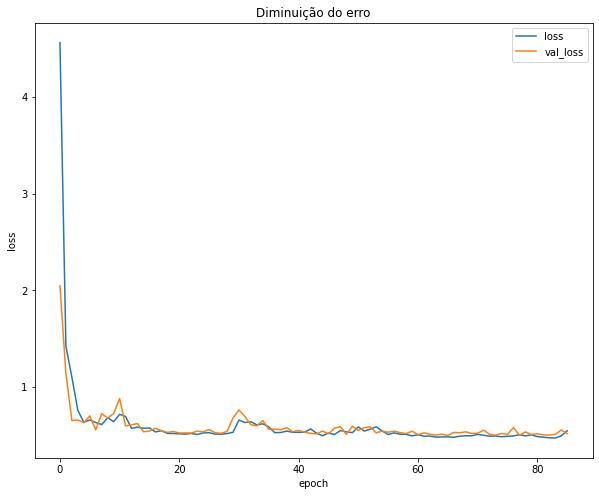

In [45]:
hist_df2 = pd.DataFrame(history.history)

plt.figure(figsize=(10,8))
hist_df2['loss'].plot()
hist_df2['val_loss'].plot()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Diminuição do erro')
plt.legend()

min = hist_df2['val_loss'].min()
print(f'Validation Loss mínimo = {min}')

Dropout:

As layers de dropout ajudam a corrigir Overfitting, a ideia é abandonar uma fração dos neurônios de uma rede randomicamente a cada treinamento, isto dificulta o aprendizado de ruído nos dados de treino dificultando assim o overfitting.

Implementamos o dropout como uma layer na estrutura da network e podemos informar a fração de neurônios abandonados. 

Batch Normalization:

A próxima layer especial, também chamda de batchnorm, ajuda a corrigir treino lento ou instável. Normalizar os dados pode fazer o comportamento do treino mais estável, a camada de normalização pega cada batch, o normaliza com sua própria média e desvio padrão e coloca uma nova escala nos dados.

Utilizando essas novas layers no problema anterior:

In [47]:
modelo = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1)
])

modelo.compile(
    optimizer='adam',
    loss='mae'
)

Validation Loss mínimo = 0.5346575975418091


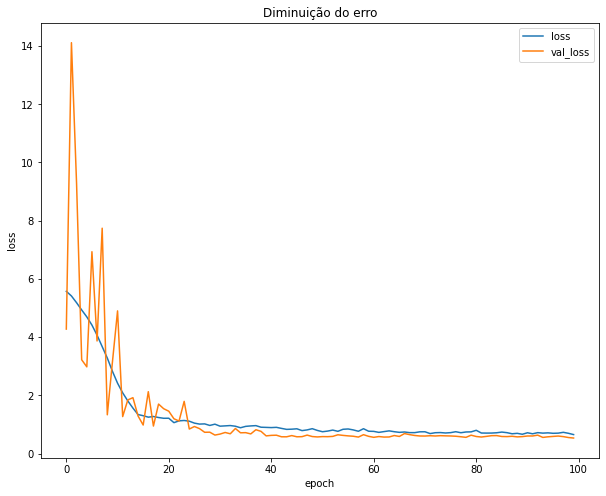

In [48]:
history = modelo.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=100,
    verbose=0
)

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(10,8))
history_df['loss'].plot()
history_df['val_loss'].plot()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Diminuição do erro')
plt.legend()

min = history_df['val_loss'].min()
print(f'Validation Loss mínimo = {min}')

Geralmente a padronização dos dados leva a resultados melhores para os modelos, especialmente para dados mais complexos.

Até agora tratamos do problema de regressão, porém podemos usar redes neurais para resolver problemas de classificação, a maior diferença esta na Loss Function, que informa a rede se ela esta acertando ou não as previsões.

Classificação Binária:

Classificação entre uma ou duas classes é um problema recorrente em Machine Learning, geralmente nos dados brutos estas informações estão classificadas como strings como "Sim" e "Não", "Gato" e "Cachorro", "Positivo" e "Negativo". Para colocar no formato adequado para as redes neurais, classificaremos uma classe como "0" e outra como "1".

Acurácia e Cross-Entropy:

Acurácia é uma métrica comum em problemas de classificação, ela consiste em uma razão entre predições corretas sobre o número total de previsões:

$a = \dfrac{previsões\ corretas}{número\ de\ previsões}$

O principal problema desta métrica é que ela não pode ser utilizada como uma Loss Function, SGD necessita de uma Loss Function contínua, ou seja, que varia suavemente, sem quebras ou "saltos".

A função substituta para o nosso problema é a Cross-Entropy! no problema de regressão usavamos a diferença entre o valor real e o valor previsto, com o intúito de diminuir esta diferença, ou seja, diminuir a distância entre as duas medidas.

Para classificação, queremos a distância entre probabilidades, Cross-Entropy é uma espécie de medida de distância entre uma distribuição de probabilidades e outra distribuição.

Criando probabilidades usando a função Sigmoide:

Cross-Entropy requer que os imputs sejam números entre 0 e 1, para converter os valores reais de outputs produzidos pelas layers em probabilidades, para isso vamos utilizar uma nova função de ativação, a função sigmoide.

Exemplo:

Para exemplificar os conceitos apresentados anteriormente, vamos utilizar o conjunto de dados da Ionosfera, este dataset contém features obtidas por sinais de radares na ionosfera e o objetivo é calssificar se um sinal vem de algum objeto.

In [49]:
ion = pd.read_csv('ion.csv')

ion.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
1,2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
2,3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
3,4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
4,5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [50]:
# Aplicando uma função para classificar a variável alvo entre "0" e "1":

ion['Class'] = ion['Class'].map({'good':0, 'bad':1})

# Removendo valores nulos:

ion.dropna(axis=1, inplace=True)

# Separando o conjunto de dados entre treino e validação:

X = ion.drop('Class', axis=1)
y = ion['Class']

X_train, X_valid, y_train, y_valid = train_test_split(X,y)

In [51]:
modelo = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

modelo.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

# Para problemas com apenas duas classes utilizamos a versão "binary" da métrica e loss function.

In [52]:
es = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = modelo.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs = 1000,
    callbacks = [es],
    verbose=0,
)

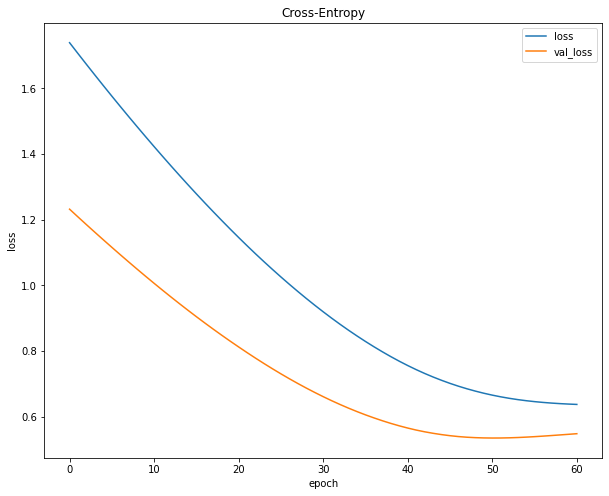

In [56]:
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(10,8))
history_df['loss'].plot()
history_df['val_loss'].plot()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Cross-Entropy')
plt.legend()

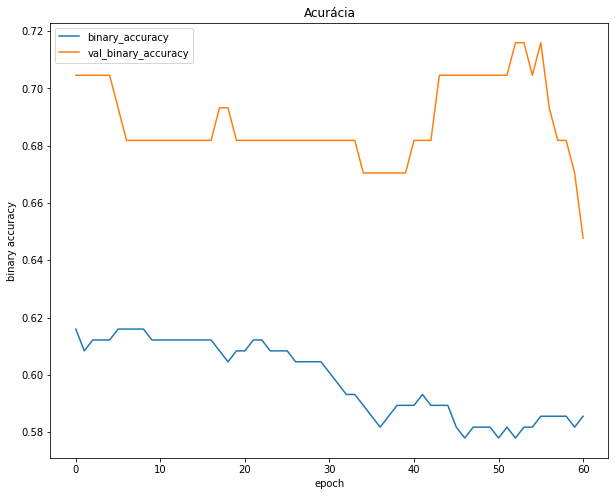

In [57]:
plt.figure(figsize=(10,8))
history_df['binary_accuracy'].plot()
history_df['val_binary_accuracy'].plot()
plt.ylabel('binary accuracy')
plt.xlabel('epoch')
plt.title('Acurácia')
plt.legend()
